# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# This is a tool that we'll need later for our plot titles
import datetime


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Define the base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Add the api-key to our base url
url = url + "&appid=" + weather_api_key
# Adjust the units since we don't want to default into Kelvin
url = url + "&units=imperial"

In [5]:
# Create a count variable for the logging output
# Create a dictionary to temporarily hold the output from the API calls
count = 0
data_storage = {"City":[], "Lat":[],"Lng":[],"Max Temp":[],"Humidity":[],"Cloudiness":[],"Wind Speed":[],"Country":[],"Date":[]}

print('Beginning Data Retrieval')
print('-----------------------------')
for city in cities:
    try:
        # Add the city to the base url
        query_url = url + "&q=" + city
        weather = requests.get(query_url).json()
        
        # Obtain each of the datapoints from the json structure that was returned
        data_storage['Lat'].append(weather['coord']['lat'])
        data_storage['Lng'].append(weather['coord']['lon'])
        data_storage['Max Temp'].append(weather['main']['temp_max'])
        data_storage['Humidity'].append(weather['main']['humidity'])
        data_storage['Cloudiness'].append(weather['clouds']['all'])
        data_storage['Wind Speed'].append(weather['wind']['speed'])
        data_storage['Country'].append(weather['sys']['country'])
        data_storage['Date'].append(weather['dt'])
        data_storage['City'].append(city)
        
        # Iterate count for printing the number only if we get a valid city then print our log
        count += 1
        print('Processing City Number ' + str(count) + ": " + city)
    except:
        # Let the user know a city wasn't found.
        print('City Not Found. Moving to next City.')
print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')

Beginning Data Retrieval
-----------------------------
Processing City Number 1: verkh-usugli
Processing City Number 2: fortuna
Processing City Number 3: punta arenas
Processing City Number 4: mataura
Processing City Number 5: ahipara
Processing City Number 6: pangkalanbuun
Processing City Number 7: portland
Processing City Number 8: longyearbyen
Processing City Number 9: sitka
Processing City Number 10: port blair
Processing City Number 11: port alfred
Processing City Number 12: waipawa
Processing City Number 13: moron
Processing City Number 14: dwarka
Processing City Number 15: qui nhon
Processing City Number 16: hobart
City Not Found. Moving to next City.
Processing City Number 17: tiksi
Processing City Number 18: ukiah
Processing City Number 19: kapaa
Processing City Number 20: yellowknife
Processing City Number 21: jamestown
Processing City Number 22: dubna
Processing City Number 23: airai
Processing City Number 24: takoradi
Processing City Number 25: rikitea
Processing City Numbe

Processing City Number 203: phan thiet
Processing City Number 204: kerman
Processing City Number 205: mayo
Processing City Number 206: beringovskiy
Processing City Number 207: taoudenni
Processing City Number 208: ambon
Processing City Number 209: cairo
Processing City Number 210: gimli
Processing City Number 211: altay
Processing City Number 212: prince rupert
Processing City Number 213: mahebourg
Processing City Number 214: christchurch
Processing City Number 215: menongue
Processing City Number 216: richards bay
Processing City Number 217: bengkulu
Processing City Number 218: ancud
Processing City Number 219: maragogi
Processing City Number 220: udachnyy
Processing City Number 221: seymchan
Processing City Number 222: sinnamary
Processing City Number 223: kendari
Processing City Number 224: comodoro rivadavia
Processing City Number 225: cidreira
Processing City Number 226: gadu
Processing City Number 227: bandiagara
Processing City Number 228: micheweni
Processing City Number 229: t

City Not Found. Moving to next City.
Processing City Number 408: semirom
Processing City Number 409: belozerskoye
Processing City Number 410: manaure
Processing City Number 411: thinadhoo
Processing City Number 412: zapolyarnyy
Processing City Number 413: storforshei
Processing City Number 414: taga
Processing City Number 415: sherbakul
Processing City Number 416: octeville
Processing City Number 417: aljezur
Processing City Number 418: ihosy
City Not Found. Moving to next City.
Processing City Number 419: madang
Processing City Number 420: rio grande
Processing City Number 421: cherskiy
Processing City Number 422: grindavik
City Not Found. Moving to next City.
Processing City Number 423: jardim do serido
Processing City Number 424: kamina
Processing City Number 425: inhambane
Processing City Number 426: nantucket
Processing City Number 427: rovaniemi
Processing City Number 428: otaki
Processing City Number 429: korla
Processing City Number 430: bantou
Processing City Number 431: sirja

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Check to make sure that we collected the same number of datapoints into all of our keys
# Can't create a dataframe from the data if the columns are of unequal length
for key in data_storage:
    print(len(data_storage[key]))

557
557
557
557
557
557
557
557
557


In [7]:
# Initialize the dataframe from the dictionary we created earlier and visualize it
weather_df = pd.DataFrame(data_storage)
# Write our dataframe to a csv file in the current folder
weather_df.to_csv('Weather_Check.csv')
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,verkh-usugli,52.70,115.17,29.70,82,79,6.87,RU,1604114489
1,fortuna,40.60,-124.16,51.80,93,1,4.70,US,1604114284
2,punta arenas,-53.15,-70.92,48.20,76,75,6.93,CL,1604114352
3,mataura,-46.19,168.86,53.01,89,100,13.00,NZ,1604114489
4,ahipara,-35.17,173.17,66.67,88,46,14.16,NZ,1604114489


In [8]:
# Create a summary statistics table for our dataframe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,20.045009,19.615476,56.961777,74.208259,53.157989,7.912298,1.604114e+09
std,33.724552,90.486443,22.263582,20.411673,40.159531,5.948073,7.873950e+01
min,-54.800000,-179.170000,-10.440000,13.000000,0.000000,0.250000,1.604114e+09
25%,-7.110000,-58.620000,41.880000,62.000000,5.000000,3.360000,1.604114e+09
50%,22.920000,24.670000,60.240000,80.000000,62.000000,6.490000,1.604115e+09
75%,48.650000,102.660000,75.610000,90.000000,91.000000,10.670000,1.604115e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,39.260000,1.604115e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# We inspect the data and see that in the humidity column the Max is 100. Therefore we won't have any cities to remove

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [12]:
# Calculate the date from the Unix Timestamp provided
# Notice that all the dates are similar, ust timestamps from the same day
# So we will take the date and use it in our plot titles

month = datetime.date.fromtimestamp(data_storage['Date'][0]).month
day = datetime.date.fromtimestamp(data_storage['Date'][0]).day
year = datetime.date.fromtimestamp(data_storage['Date'][0]).year
date = "(" + str(month) + "/" + str(day) + "/" + str(year) + ")"

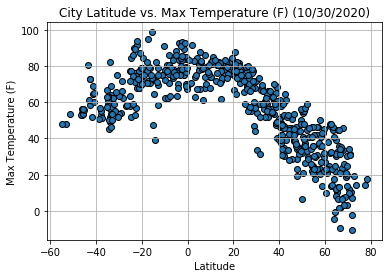

In [13]:
# Plot the data and adjust lables and title as appropriate
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (F) ' + date)
plt.savefig('./Images/City Latitude vs. Max Temperature (F).png')
plt.show()

### City Latitude v Max Temperature
* This plot depicts the max temperature of a place relative to its longitude (distance from the equator). There is a clear trend that shows increasing temperature as you go closer to the equator at Latitude = 0.
* There is also a clear demonstration of the fact that more of the northern hemisphere is populated than the southern. There are more cities on the right side of the plot and they extend further away from the centerline. This means places closer to the north pole were selected. This may be an aberration of the specific points we chose, however, numerous runs of this data show a similar trend indicating that there are more cities that can be found in the northern artic regions than in the southern polar region. Just looking at a map this makes sense because the arctic circle is mostly land while the area around Antarctica is almost entirely ocean.

## Latitude vs. Humidity Plot

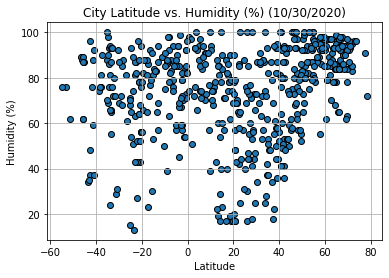

In [14]:
# Plot the data and adjust lables and title as appropriate
plt.scatter(weather_df['Lat'],weather_df['Humidity'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (%) ' + date)
plt.savefig('./Images/City Latitude vs. Humidity (%).png')
plt.show()

### City Latitude v Humidity
* This plot demonstrates the relationship between latitude and humidty.
* There are two notable clusters: around Latitude = 0 and around Latitude 60.
* These clusters are two distinct climates, the tropics around the equator and "Humid Continental." The latter occurs within large land masses far from oceans and far from the equator (but before the temperature turns too cold and everyhting turns to precipitation). This occurs only in the northern hemisphere because there aren't huge landmasses in the southern hemishpere.

## Latitude vs. Cloudiness Plot

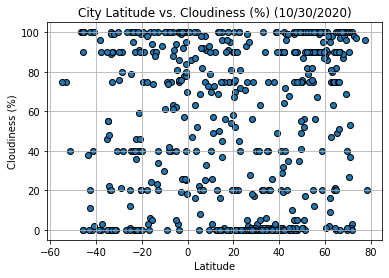

In [15]:
# Plot the data and adjust lables and title as appropriate
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (%) ' + date)
plt.savefig('./Images/City Latitude vs. Cloudiness (%).png')
plt.show()

### Latitude v Cloudiness
* This plot demonstrates the relationship between latitude and the level of cloud cover.
* There does not appear to be a significant trend over latitude.
* The only trends we can really see in this data are related to how cloud cover is measured. There appear to be bands of values (0,20,40,~75,~88,100). This might indicate that the cloud cover percentage isn't a continuous variable but is instead a quantized variable.

## Latitude vs. Wind Speed Plot

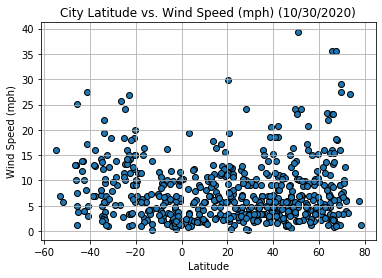

In [16]:
# Plot the data and adjust lables and title as appropriate
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (mph) ' + date)
plt.savefig('./Images/City Latitude vs. Wind Speed (mph).png')
plt.show()

### City Latitude v Wind Speed
* This graph displays the relationship between latitude and wind speed.
* There appears to be no clear trend between the two variables except that the earth has a relatively constant low wind speed nearly everywhere with a few much higher outliers.

## Linear Regression

In [17]:
# Create our northern and southern hemisphere dataframes
north_df = weather_df.loc[weather_df['Lat'] >= 0,:]
south_df = weather_df.loc[weather_df['Lat'] < 0,:]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.8879583082452742


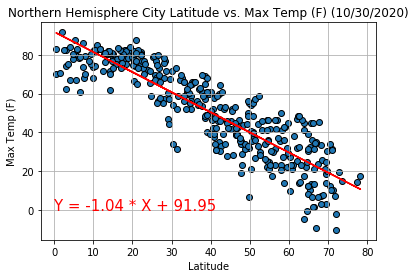

In [18]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'],north_df['Max Temp'])
yvals = round(slope,2) * north_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(north_df['Lat'],north_df['Max Temp'],edgecolors = 'black')
plt.plot(north_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere City Latitude vs. Max Temp (F) ' + date)
plt.annotate(line_name, (0,0),fontsize=15,color="red")
plt.savefig('./Images/Northern Hemisphere City Latitude vs. Max Temp (F).png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.648415757159929


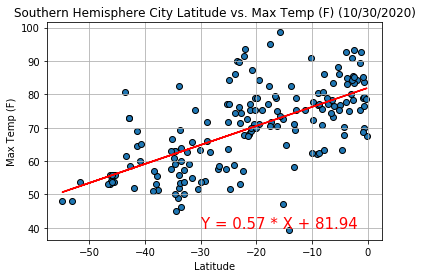

In [19]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'],south_df['Max Temp'])
yvals = round(slope,2) * south_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(south_df['Lat'],south_df['Max Temp'],edgecolors = 'black')
plt.plot(south_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere City Latitude vs. Max Temp (F) ' + date)
plt.annotate(line_name, (-30,40),fontsize=15,color="red")
plt.savefig('./Images/Southern Hemisphere City Latitude vs. Max Temp (F).png')
plt.show()

### Hemisphere v Max Temperature Charts
* These two charts demonstrate the relationship between latitude and maximum temperature for each hemisphere.
* We see the same trends for both groups that we found in the combined analysis (increasing temperature moving towards the equator)
* The trend appears to be less strong in the southern hemisphere. Especially closer to the equator (~-20) you find a very large distribution of temperatures. This makes sense if we look at a map. Around -20 we find: Bolivia/Northern Chile (containing the Andes mountains), Zimbabwe (savannah), and Northern Australia (desert/savannah).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.35553189555196524


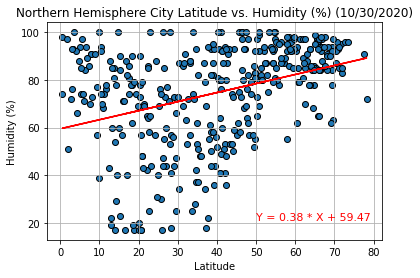

In [20]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'],north_df['Humidity'])
yvals = round(slope,2) * north_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(north_df['Lat'],north_df['Humidity'],edgecolors = 'black')
plt.plot(north_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere City Latitude vs. Humidity (%) ' + date)
plt.annotate(line_name, (50,21),fontsize=11,color="red")
plt.savefig('./Images/Northern Hemisphere City Latitude vs. Humidity (%).png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.0835415483658264


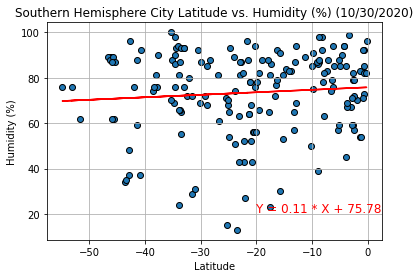

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'],south_df['Humidity'])
yvals = round(slope,2) * south_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(south_df['Lat'],south_df['Humidity'],edgecolors = 'black')
plt.plot(south_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere City Latitude vs. Humidity (%) ' + date)
plt.annotate(line_name, (-20,21),fontsize=12,color="red")
plt.savefig('./Images/Southern Hemisphere City Latitude vs. Humidity (%).png')
plt.show()

### Hemisphere v Humidity Charts
* These charts display latitude v humidity for each hemisphere.
* In the norhtern hemisphere we again find our "humid continental" cluster up near 60 degrees. In both hemispheres the equatorial increase in humidity is less obvious.
* Also something I hadn't noticed on the previous plot (but definitely was present there too), there are very few places with a low humidity. There are only ~10 cities with humidity <20%. 
* Fun fact: The humidity of the Sahara Desert is typically around 25% so these very low places are likely found in deserts.
* Bonus fun fact: most homes have a humidty of 15-20% meaning most homes are drier than the Sahara.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.22194165317591802


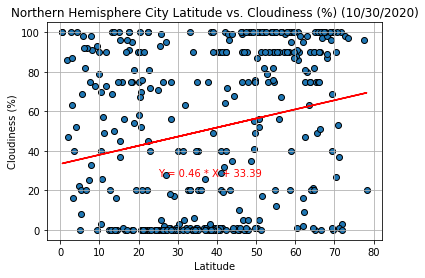

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'],north_df['Cloudiness'])
yvals = round(slope,2) * north_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(north_df['Lat'],north_df['Cloudiness'],edgecolors = 'black')
plt.plot(north_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness (%) ' + date)
plt.annotate(line_name, (25,27),fontsize=10,color="red")
plt.savefig('./Images/Northern Hemisphere City Latitude vs. Cloudiness (%).png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.18068949729529227


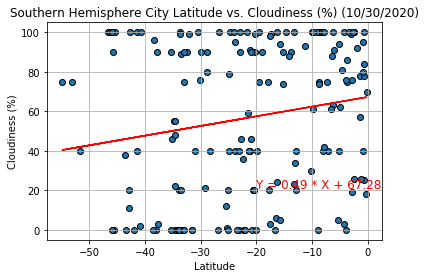

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'],south_df['Cloudiness'])
yvals = round(slope,2) * south_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(south_df['Lat'],south_df['Cloudiness'],edgecolors = 'black')
plt.plot(south_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness (%) ' + date)
plt.annotate(line_name, (-20,21),fontsize=12,color="red")
plt.savefig('./Images/Southern Hemisphere City Latitude vs. Cloudiness (%).png')
plt.show()

### Hemisphere v Cloudiness
* These plots show the relationship between latitude and cloudiness for each hemisphere
* We see the same trend here as we saw in the combined plot. There isnt' any clear relationship between the two variables but there is some level of quantization of the values for cloudiness.
* Fun fact: the variable name for measuring cloud cover is the Okta.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.14008544863830352


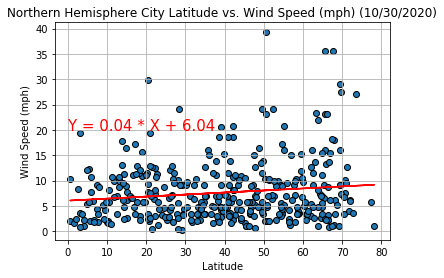

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_df['Lat'],north_df['Wind Speed'])
yvals = round(slope,2) * north_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(north_df['Lat'],north_df['Wind Speed'],edgecolors = 'black')
plt.plot(north_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed (mph) ' + date)
plt.annotate(line_name, (0,20),fontsize=15,color="red")
plt.savefig('./Images/Northern Hemisphere City Latitude vs. Wind Speed (mph).png')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.3210115303133978


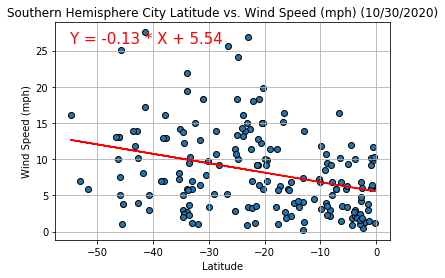

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_df['Lat'],south_df['Wind Speed'])
yvals = round(slope,2) * south_df['Lat'] + round(intercept,2)

line_name = 'Y = ' + str(round(slope,2)) + ' * X' + ' + ' + str(round(intercept,2))


print('The r value is: ' + str(abs(rvalue)))

plt.scatter(south_df['Lat'],south_df['Wind Speed'],edgecolors = 'black')
plt.plot(south_df['Lat'],yvals,color = 'red')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed (mph) ' + date)
plt.annotate(line_name, (-55,26),fontsize=15,color="red")
plt.savefig('./Images/Southern Hemisphere City Latitude vs. Wind Speed (mph).png')
plt.show()

### Hemisphere v Wind Speed
* These charts show the relationship between latitude and windspeed for each hemisphere
* We see similar results here as in our combined plot.
* The data seems to fluctuate depending upon the run which plot has more high wind outliers. As of this writing there are a few cities with higher windspeed in the northern hemisphere (Near 40mph).
* Fun fact: Baku (the capital of Azerbaijan) is known as the City of Winds